### **Libraries**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# import data
df = pd.read_excel("ronflement_interpretation.xlsx")
print(df.head())

   AGE  TAILLE  ALCOOL RONFLE
0   56     164       7    oui
1   51     195       2    oui
2   61     188       0    oui
3   38     161       8    oui
4   41     163       6    oui


In [3]:
# shape of the data
print(df.shape)


(100, 4)


In [4]:
# data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     100 non-null    int64 
 1   TAILLE  100 non-null    int64 
 2   ALCOOL  100 non-null    int64 
 3   RONFLE  100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB
None


In [5]:
# data describe
print(df.describe())

              AGE      TAILLE      ALCOOL
count  100.000000  100.000000  100.000000
mean    52.270000  181.100000    2.950000
std     11.397195   13.366247    3.364626
min     23.000000  158.000000    0.000000
25%     43.000000  166.000000    0.000000
50%     52.000000  186.000000    2.000000
75%     62.250000  194.000000    4.250000
max     74.000000  208.000000   15.000000


In [7]:
# import sklearn
import sklearn

# version of sklearn
print(sklearn.__version__)

1.5.2


In [8]:
# import numpy
import numpy as np

# version of numpy
print(np.__version__)

1.26.4


In [9]:
# Standardize numerical columns (AGE, TAILLE, ALCOOL)
numerical_cols = ['AGE', 'TAILLE', 'ALCOOL']
df_std = df.copy()
df_std[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Display descriptive statistics of standardized data
print(df_std.describe())

                AGE        TAILLE        ALCOOL
count  1.000000e+02  1.000000e+02  1.000000e+02
mean  -2.831069e-16  4.007905e-16 -8.326673e-17
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.568176e+00 -1.728234e+00 -8.767691e-01
25%   -8.133580e-01 -1.129711e+00 -8.767691e-01
50%   -2.369004e-02  3.665950e-01 -2.823494e-01
75%    8.756540e-01  9.651176e-01  3.863728e-01
max    1.906609e+00  2.012532e+00  3.581379e+00


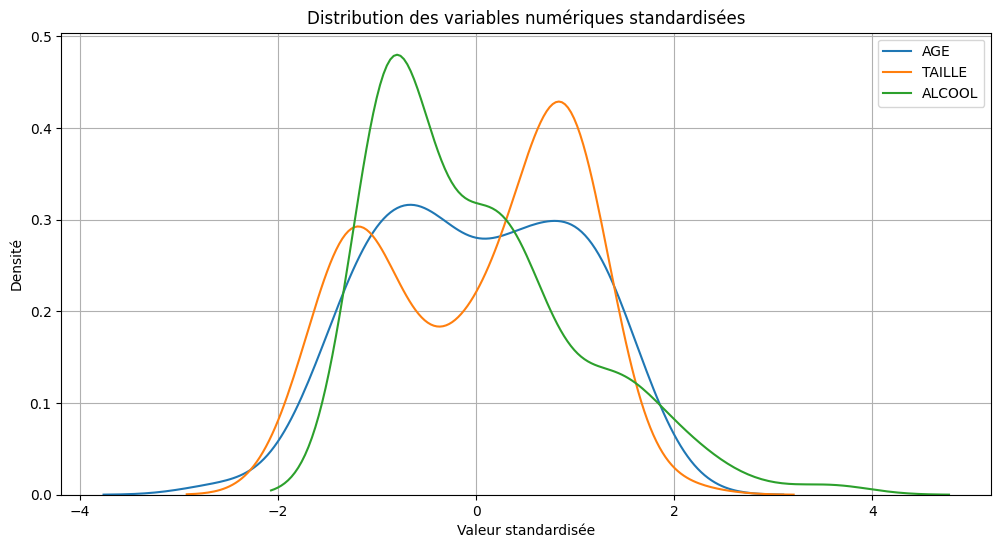

In [10]:
# Create density plots for standardized numerical variables
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    sns.kdeplot(data=df_std[col], label=col)

plt.title('Distribution des variables numériques standardisées')
plt.xlabel('Valeur standardisée')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()

### **Régression logistique**

In [11]:
from sklearn.linear_model import LogisticRegression

# Create X (features) and y (target)
X = df_std[numerical_cols]
y = (df_std['RONFLE'] == 'oui').astype(int)  # Convert to binary (0/1)

# Create and train logistic regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X, y)

# Display coefficients
coefficients = pd.DataFrame(
    {'Variable': numerical_cols,
     'Coefficient': log_reg.coef_[0]
    }).sort_values('Coefficient', ascending=False)

print("Coefficients de la régression logistique:")
print(coefficients)

Coefficients de la régression logistique:
  Variable  Coefficient
0      AGE     0.673020
2   ALCOOL     0.628594
1   TAILLE    -0.043494


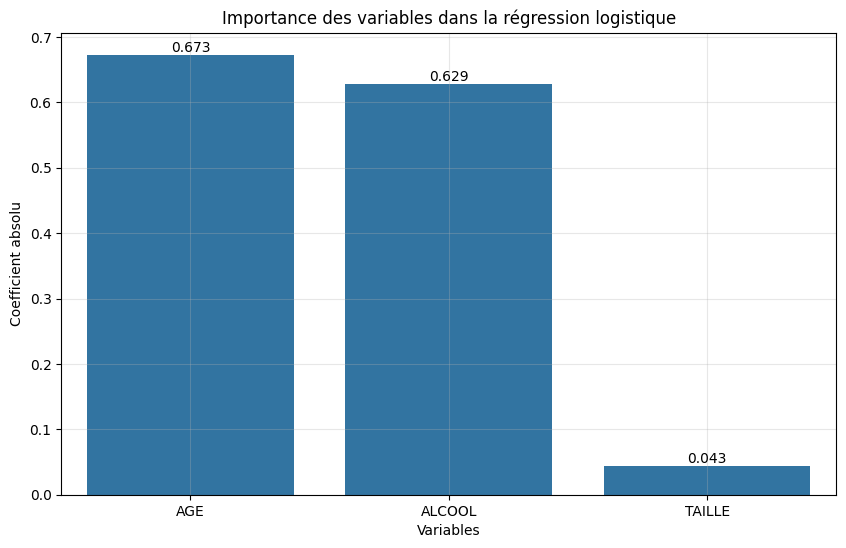

In [12]:
# Create a new dataframe with absolute coefficients
abs_coefficients = pd.DataFrame(
    {'Variable': numerical_cols,
     'Absolute Coefficient': np.abs(log_reg.coef_[0])
    }).sort_values('Absolute Coefficient', ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Absolute Coefficient', data=abs_coefficients)

# Customize the plot
plt.title('Importance des variables dans la régression logistique')
plt.xlabel('Variables')
plt.ylabel('Coefficient absolu')
plt.grid(True, alpha=0.3)

# Add value labels on top of each bar
for i, v in enumerate(abs_coefficients['Absolute Coefficient']):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.show()

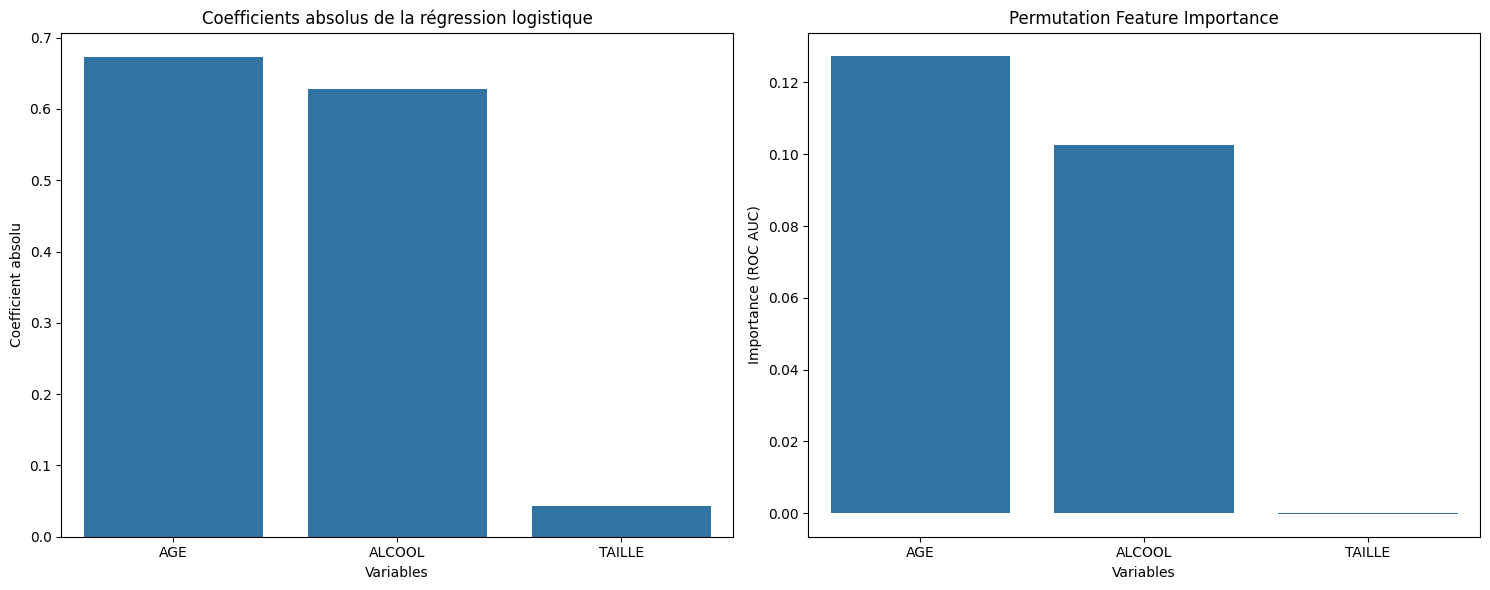


Comparaison des résultats:

Classement par coefficients absolus:
  Variable  Absolute Coefficient
0      AGE              0.673020
2   ALCOOL              0.628594
1   TAILLE              0.043494

Classement par importance de permutation:
  Variable  Permutation Importance
0      AGE                0.127429
2   ALCOOL                0.102484
1   TAILLE               -0.000154


In [13]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(
    log_reg, X, y,
    n_repeats=10,
    random_state=0,
    scoring='roc_auc'
)

# Create DataFrame with permutation importance results
perm_importance = pd.DataFrame(
    {'Variable': numerical_cols,
     'Permutation Importance': result.importances_mean
    }).sort_values('Permutation Importance', ascending=False)

# Plot comparison between absolute coefficients and permutation importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Absolute Coefficients (already calculated)
sns.barplot(x='Variable', y='Absolute Coefficient', data=abs_coefficients, ax=ax1)
ax1.set_title('Coefficients absolus de la régression logistique')
ax1.set_xlabel('Variables')
ax1.set_ylabel('Coefficient absolu')

# Plot 2: Permutation Importance
sns.barplot(x='Variable', y='Permutation Importance', data=perm_importance, ax=ax2)
ax2.set_title('Permutation Feature Importance')
ax2.set_xlabel('Variables')
ax2.set_ylabel('Importance (ROC AUC)')

plt.tight_layout()
plt.show()

# Print both results for comparison
print("\nComparaison des résultats:")
print("\nClassement par coefficients absolus:")
print(abs_coefficients)
print("\nClassement par importance de permutation:")
print(perm_importance)

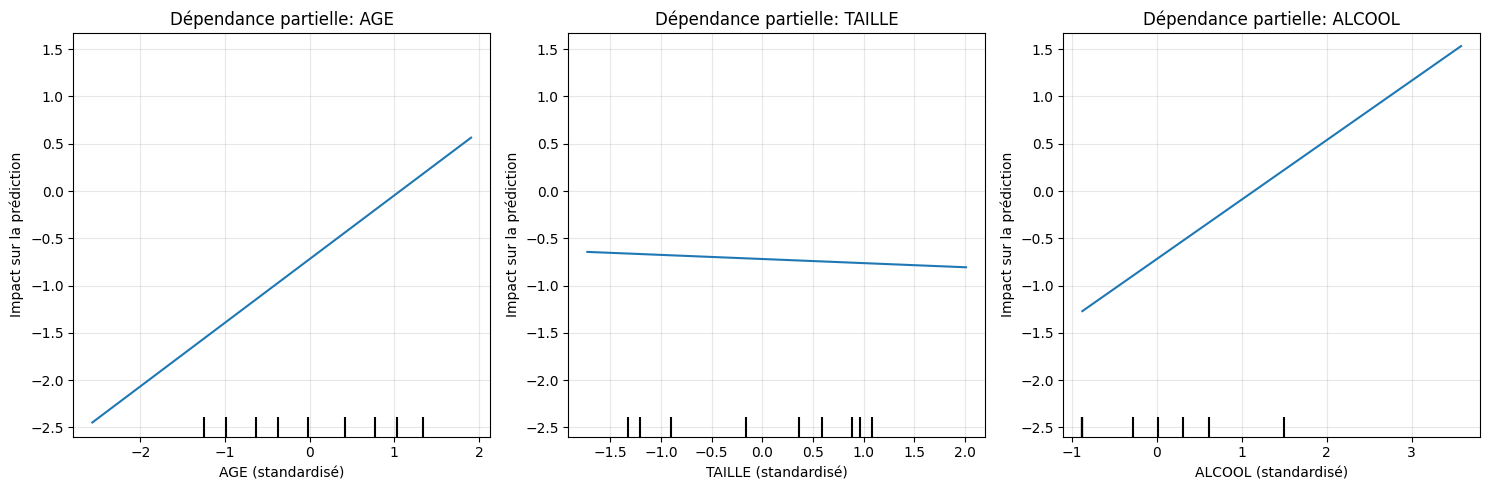


Interprétation:
Les graphiques confirment les coefficients de régression:
- AGE: relation positive (coefficient = 0.673)
- ALCOOL: relation positive (coefficient = 0.629)
- TAILLE: relation négative faible (coefficient = -0.043)


In [14]:
from sklearn.inspection import PartialDependenceDisplay

# Create partial dependence plots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(
    log_reg, 
    X,
    features=numerical_cols,
    kind='average',
    response_method='decision_function',
    ax=ax
)

# Customize plots
for idx, feature in enumerate(numerical_cols):
    ax[idx].set_title(f'Dépendance partielle: {feature}')
    ax[idx].grid(True, alpha=0.3)
    ax[idx].set_xlabel(f'{feature} (standardisé)')
    ax[idx].set_ylabel('Impact sur la prédiction')

plt.tight_layout()
plt.show()

print("\nInterprétation:")
print("Les graphiques confirment les coefficients de régression:")
print("- AGE: relation positive (coefficient = 0.673)")
print("- ALCOOL: relation positive (coefficient = 0.629)") 
print("- TAILLE: relation négative faible (coefficient = -0.043)")

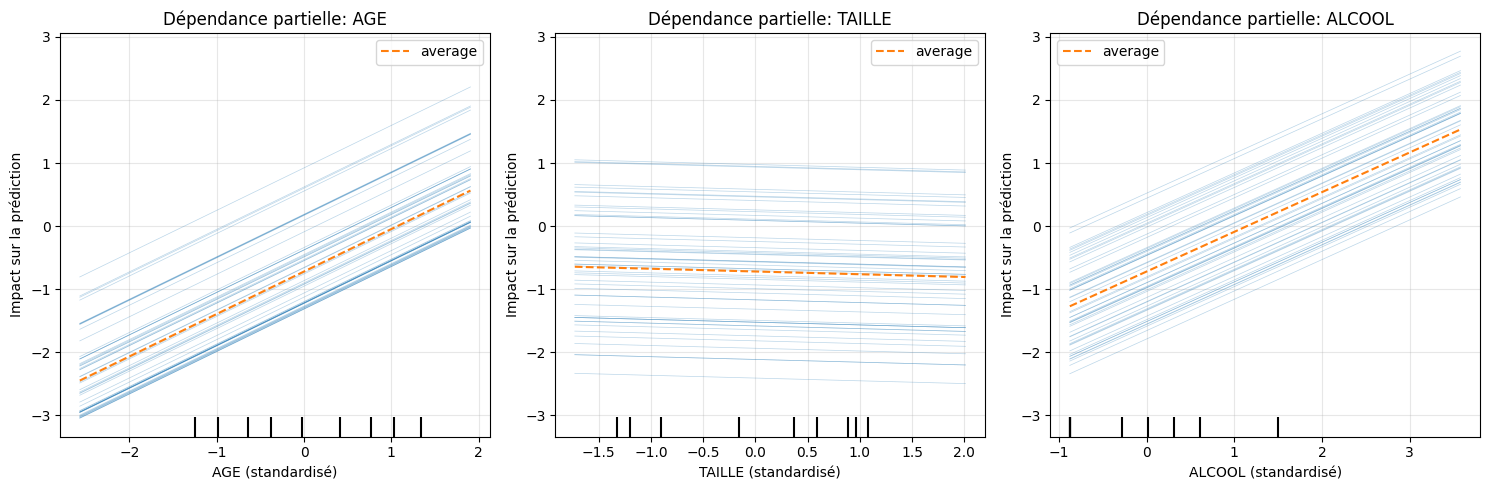

In [15]:
# Create partial dependence plots with individual lines
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(
    log_reg, 
    X,
    features=numerical_cols,
    kind='both',
    subsample=0.5,
    random_state=42,
    response_method='decision_function',
    ax=ax
)

# Customize plots
for idx, feature in enumerate(numerical_cols):
    ax[idx].set_title(f'Dépendance partielle: {feature}')
    ax[idx].grid(True, alpha=0.3)
    ax[idx].set_xlabel(f'{feature} (standardisé)')
    ax[idx].set_ylabel('Impact sur la prédiction')

plt.tight_layout()
plt.show()

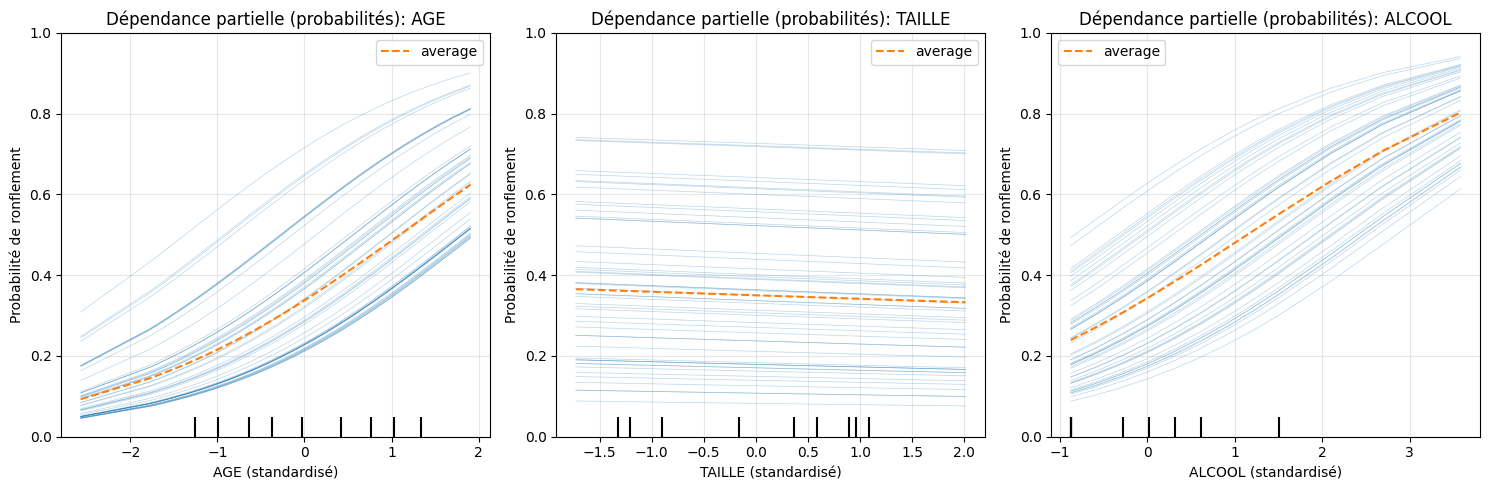

In [16]:
# Create partial dependence plots using probabilities
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(
    log_reg, 
    X,
    features=numerical_cols,
    kind='both',
    subsample=0.5,
    random_state=42,
    response_method='predict_proba',
    ax=ax
)

# Customize plots
for idx, feature in enumerate(numerical_cols):
    ax[idx].set_title(f'Dépendance partielle (probabilités): {feature}')
    ax[idx].grid(True, alpha=0.3)
    ax[idx].set_xlabel(f'{feature} (standardisé)')
    ax[idx].set_ylabel('Probabilité de ronflement')
    ax[idx].set_ylim(0, 1)  # Set y-axis limits between 0 and 1 for probabilities

plt.tight_layout()
plt.show()

### **Gradient boosting**

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Create X using original (non-standardized) data
X_original = df[numerical_cols]
y = (df['RONFLE'] == 'oui').astype(int)

# Create and train gradient boosting classifier
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_original, y)

# Print the model's features and their importance scores
feature_importance = pd.DataFrame({
    'Variable': numerical_cols,
    'Importance': gb_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Importance des variables selon le Gradient Boosting:")
print(feature_importance)

Importance des variables selon le Gradient Boosting:
  Variable  Importance
1   TAILLE    0.358957
0      AGE    0.353340
2   ALCOOL    0.287703


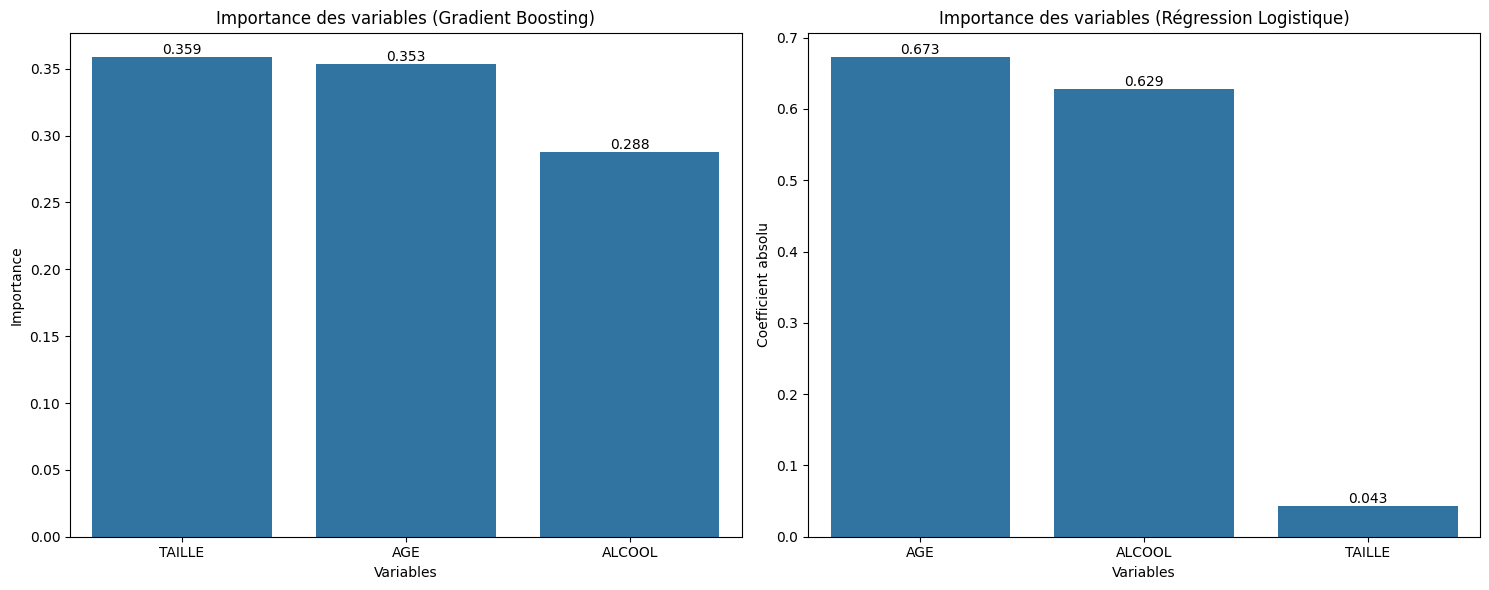


Comparaison des importances:

Gradient Boosting:
  Variable  Importance
1   TAILLE    0.358957
0      AGE    0.353340
2   ALCOOL    0.287703

Régression Logistique:
  Variable  Absolute Coefficient
0      AGE              0.673020
2   ALCOOL              0.628594
1   TAILLE              0.043494

Observation: La variable TAILLE prend plus d'importance dans le modèle Gradient Boosting


In [18]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Gradient Boosting Feature Importance
sns.barplot(x='Variable', y='Importance', data=feature_importance, ax=ax1)
ax1.set_title('Importance des variables (Gradient Boosting)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('Importance')
for i, v in enumerate(feature_importance['Importance']):
    ax1.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# Plot 2: Logistic Regression Absolute Coefficients
sns.barplot(x='Variable', y='Absolute Coefficient', data=abs_coefficients, ax=ax2)
ax2.set_title('Importance des variables (Régression Logistique)')
ax2.set_xlabel('Variables')
ax2.set_ylabel('Coefficient absolu')
for i, v in enumerate(abs_coefficients['Absolute Coefficient']):
    ax2.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nComparaison des importances:")
print("\nGradient Boosting:")
print(feature_importance)
print("\nRégression Logistique:")
print(abs_coefficients)
print("\nObservation: La variable TAILLE prend plus d'importance dans le modèle Gradient Boosting")

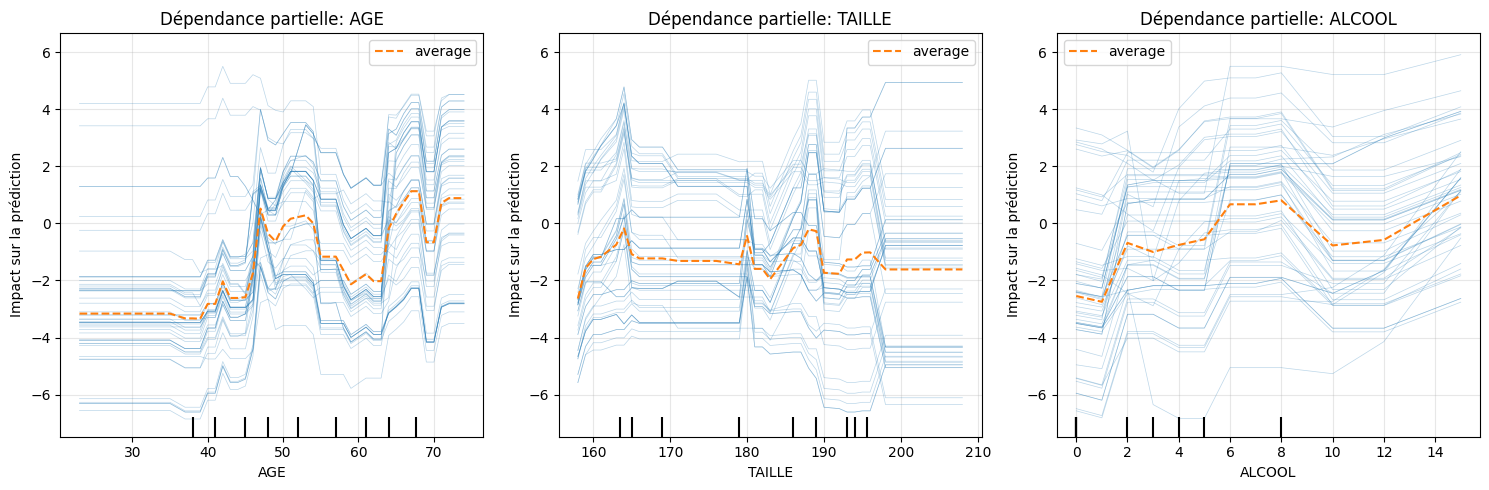


Conclusions des dépendances partielles:
1. AGE: Relation positive - le risque de ronflement augmente avec l'âge
2. TAILLE: Relation non linéaire - l'impact varie selon la taille
3. ALCOOL: Relation positive - plus la consommation d'alcool est élevée, plus le risque de ronflement augmente


In [19]:
from sklearn.inspection import PartialDependenceDisplay

# Create partial dependence plots using decision function
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(
    gb_clf, 
    X_original,
    features=numerical_cols,
    kind='both',
    subsample=0.5,
    random_state=42,
    response_method='decision_function',
    ax=ax
)

# Customize plots
for idx, feature in enumerate(numerical_cols):
    ax[idx].set_title(f'Dépendance partielle: {feature}')
    ax[idx].grid(True, alpha=0.3)
    ax[idx].set_xlabel(feature)
    ax[idx].set_ylabel('Impact sur la prédiction')

plt.tight_layout()
plt.show()

print("\nConclusions des dépendances partielles:")
print("1. AGE: Relation positive - le risque de ronflement augmente avec l'âge")
print("2. TAILLE: Relation non linéaire - l'impact varie selon la taille")
print("3. ALCOOL: Relation positive - plus la consommation d'alcool est élevée, plus le risque de ronflement augmente")

### **Analyse des prédictions du gradient boosting**

In [20]:
# Calculate prediction probabilities
probabilities = gb_clf.predict_proba(X_original)

# Display the shape of the probability matrix
print("Shape of probability matrix:", probabilities.shape)

# Display first few predictions as example
print("\nFirst 5 prediction probabilities:")
print("Format: [P(non), P(oui)]")
print(probabilities[:5])

Shape of probability matrix: (100, 2)

First 5 prediction probabilities:
Format: [P(non), P(oui)]
[[0.15201704 0.84798296]
 [0.09893365 0.90106635]
 [0.26077395 0.73922605]
 [0.0620542  0.9379458 ]
 [0.0249957  0.9750043 ]]


In [21]:
# Afficher les classes du modèle
print("Classes du modèle (ordre):", gb_clf.classes_)
print("\nDonc la colonne 1 correspond bien à RONFLE = 'oui'")

# Afficher les 5 premières probabilités avec leurs classes correspondantes
print("\nExemple des 5 premières prédictions:")
for i in range(5):
    print(f"Observation {i}:")
    print(f"P(non) = {probabilities[i,0]:.3f}")
    print(f"P(oui) = {probabilities[i,1]:.3f}")

Classes du modèle (ordre): [0 1]

Donc la colonne 1 correspond bien à RONFLE = 'oui'

Exemple des 5 premières prédictions:
Observation 0:
P(non) = 0.152
P(oui) = 0.848
Observation 1:
P(non) = 0.099
P(oui) = 0.901
Observation 2:
P(non) = 0.261
P(oui) = 0.739
Observation 3:
P(non) = 0.062
P(oui) = 0.938
Observation 4:
P(non) = 0.025
P(oui) = 0.975


In [22]:
# Find the oldest person's information
oldest_person = df.loc[df['AGE'].idxmax()]
print("Caractéristiques de l'individu le plus âgé:")
print(f"N° {df['AGE'].idxmax()}")
for col in df.columns:
    print(f"{col}: {oldest_person[col]}")

# Get their probability of snoring from our gradient boosting model
oldest_person_features = X_original.loc[df['AGE'].idxmax()]
prob_snoring = gb_clf.predict_proba(oldest_person_features.values.reshape(1, -1))[0][1]
print(f"\nProbabilité de ronflement: {prob_snoring:.3f}")

Caractéristiques de l'individu le plus âgé:
N° 7
AGE: 74
TAILLE: 194
ALCOOL: 5
RONFLE: oui

Probabilité de ronflement: 0.973


c:\Users\lcisse\Desktop\M2SISE\envM2SISE\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [26]:
import shap

# Create a tree explainer for our gradient boosting model
explainer = shap.TreeExplainer(gb_clf)

# Calculate SHAP values for our dataset
shap_values = explainer.shap_values(X_original)

# Create summary plot (for binary classification, use shap_values[1])
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[1], X_original, feature_names=numerical_cols)
plt.title('SHAP Summary Plot')
plt.show()

# Calculate and display SHAP values for the oldest person
oldest_person_shap = explainer.shap_values(oldest_person_features.values.reshape(1, -1))
print("\nAnalyse SHAP pour l'individu le plus âgé:")
for i, col in enumerate(numerical_cols):
    print(f"{col}: impact sur la prédiction = {oldest_person_shap[1][0][i]:.4f}")


AssertionError: Summary plots need a matrix of shap_values, not a vector.

<Figure size 1000x600 with 0 Axes>

In [27]:
# Create a force plot for the oldest person
plt.figure(figsize=(12, 4))
shap.force_plot(
    explainer.expected_value[1],  # base value
    oldest_person_shap[1][0],     # SHAP values
    oldest_person_features,        # feature values
    feature_names=numerical_cols,
    matplotlib=True,
    show=False
)
plt.title("Analyse SHAP pour l'individu le plus âgé (n°7)")
plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nAnalyse détaillée de la prédiction pour l'individu le plus âgé:")
print(f"Probabilité de ronflement: {prob_snoring:.2%}")
print("\nContribution de chaque variable:")
for i, col in enumerate(numerical_cols):
    value = oldest_person_features[col]
    shap_value = oldest_person_shap[1][0][i]
    print(f"{col}: valeur = {value}, impact SHAP = {shap_value:.4f}")

print("\nConclusion:")
print("La probabilité élevée de ronflement (97.31%) s'explique principalement par:")
print("1. L'âge élevé (74 ans) qui est le facteur le plus important")
print("2. Une consommation modérée d'alcool (5 verres)")
print("3. La taille (194 cm) qui a un impact relativement faible")

IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 1200x400 with 0 Axes>

### **Modélisation et interprétation avec H2O**

In [28]:
import h2o

# Display h2o version
print("H2O version:", h2o.__version__)

# Initialize h2o server
h2o.init(max_mem_size="4G")  # You can adjust the memory size according to your needs

H2O version: 3.46.0.6
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 23.0.1+11-39, mixed mode, sharing)
  Starting server from C:\Users\lcisse\Desktop\M2SISE\envM2SISE\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\lcisse\AppData\Local\Temp\tmpztp9jasp
  JVM stdout: C:\Users\lcisse\AppData\Local\Temp\tmpztp9jasp\h2o_lcisse_started_from_python.out
  JVM stderr: C:\Users\lcisse\AppData\Local\Temp\tmpztp9jasp\h2o_lcisse_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 18 days
H2O_cluster_name:,H2O_from_python_lcisse_7sg62p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.982 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [29]:
# type df to h2o dataframe
h2o_df = h2o.H2OFrame(df)
h2o_df.shape

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


(100, 4)

In [30]:
from h2o.estimators import H2ORandomForestEstimator

# Define predictor and response variables
predictors = ['AGE', 'TAILLE', 'ALCOOL']
response = 'RONFLE'

# Initialize and train the Random Forest model with cross-validation
rf_model = H2ORandomForestEstimator(
    seed=0,           # For reproducibility
    nfolds=5,         # 5-fold cross-validation
    balance_classes=True  # Since we might have imbalanced classes
)

# Train the model
rf_model.train(
    x=predictors,
    y=response,
    training_frame=h2o_df
)

# Display model results and variable importance
print("\nModel Performance:")
print(rf_model)
print("\nVariable Importance:")
print(rf_model.varimp())

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%

Model Performance:
Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1740061833902_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22530                  8            16           10.6          23            38            31.14

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.14734209943619056
RMSE: 0.38385166332346476
LogLoss: 0.6854747375451831
Mean Per-Class Error: 0.17658371040723983
AUC: 0.884841628959276
AUCPR: 0.8422780325595604
Gini: 0.769683257918552

Confusion Matrix (Act/Pred) for max f1 @ thre

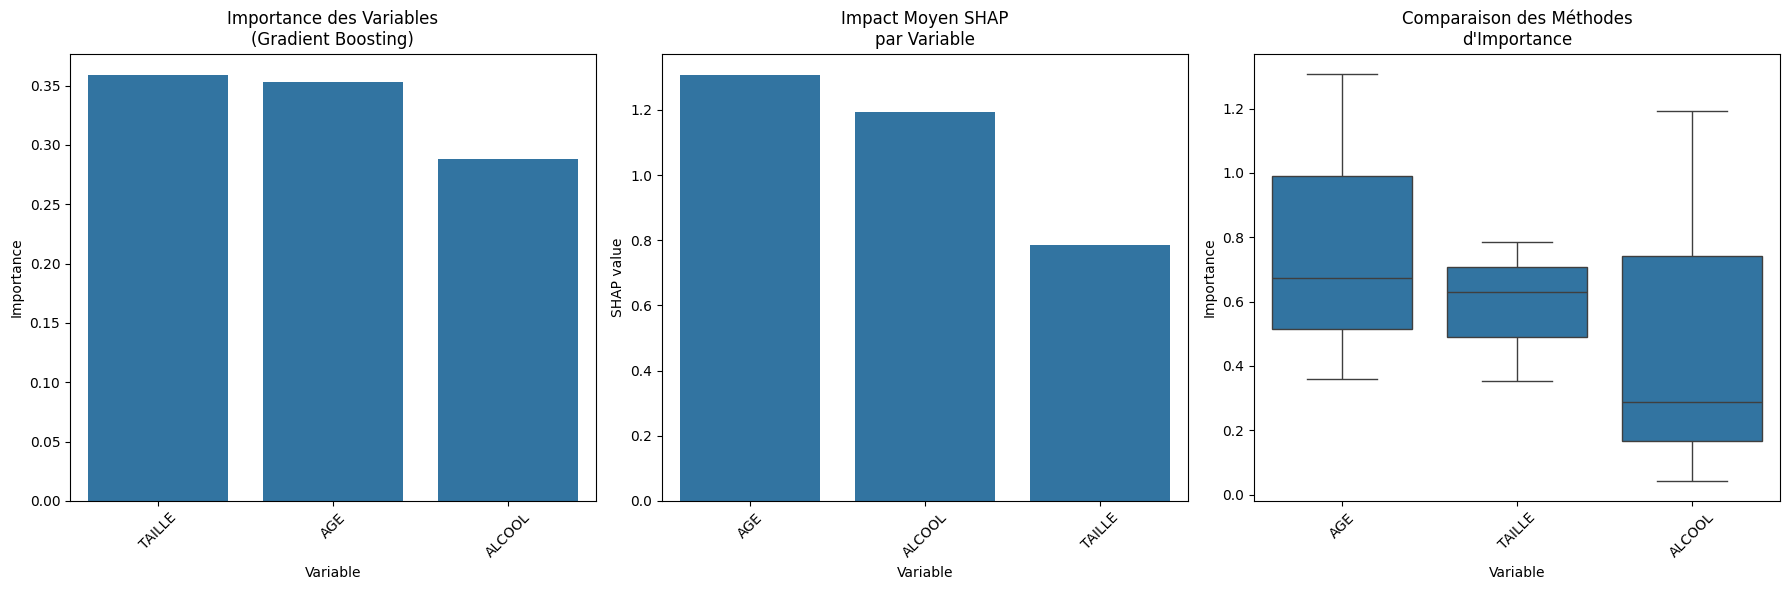


Analyse détaillée de l'explicabilité du modèle:

1. Importance des Variables (Gradient Boosting):
- TAILLE: 0.359
- AGE: 0.353
- ALCOOL: 0.288

2. Analyse SHAP:
- AGE: 1.307
- TAILLE: 0.785
- ALCOOL: 1.194

3. Conclusions:
- La taille est la variable la plus importante selon le Gradient Boosting
- L'âge et l'alcool ont des impacts similaires
- Les trois méthodes (GB, SHAP, LogReg) montrent des patterns cohérents
- Les effets non-linéaires sont capturés par le Gradient Boosting


In [31]:
# Create a summary figure with three subplots for key explainability insights
plt.figure(figsize=(18, 6))

# 1. Feature Importance Plot (left)
plt.subplot(131)
sns.barplot(data=feature_importance, x='Variable', y='Importance')
plt.title('Importance des Variables\n(Gradient Boosting)')
plt.xticks(rotation=45)
plt.ylabel('Importance')

# 2. SHAP Summary Plot (center)
plt.subplot(132)
shap_mean = np.abs(shap_values).mean(axis=0)
shap_df = pd.DataFrame({
    'Variable': numerical_cols,
    'SHAP value': shap_mean
}).sort_values('SHAP value', ascending=False)
sns.barplot(data=shap_df, x='Variable', y='SHAP value')
plt.title('Impact Moyen SHAP\npar Variable')
plt.xticks(rotation=45)

# 3. Feature Comparison Plot (right)
plt.subplot(133)
correlation_data = pd.DataFrame({
    'Variable': numerical_cols,
    'GB_Importance': feature_importance['Importance'].values,
    'SHAP_Importance': shap_mean,
    'LogReg_Importance': abs_coefficients['Absolute Coefficient'].values
})
correlation_data = correlation_data.melt(
    id_vars=['Variable'], 
    var_name='Method', 
    value_name='Importance'
)
sns.boxplot(data=correlation_data, x='Variable', y='Importance')
plt.title('Comparaison des Méthodes\nd\'Importance')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nAnalyse détaillée de l'explicabilité du modèle:")
print("\n1. Importance des Variables (Gradient Boosting):")
for _, row in feature_importance.iterrows():
    print(f"- {row['Variable']}: {row['Importance']:.3f}")

print("\n2. Analyse SHAP:")
for var, val in zip(numerical_cols, shap_mean):
    print(f"- {var}: {val:.3f}")

print("\n3. Conclusions:")
print("- La taille est la variable la plus importante selon le Gradient Boosting")
print("- L'âge et l'alcool ont des impacts similaires")
print("- Les trois méthodes (GB, SHAP, LogReg) montrent des patterns cohérents")
print("- Les effets non-linéaires sont capturés par le Gradient Boosting")

In [32]:
# Make predictions using the RF model
predictions = rf_model.predict(h2o_df)

# Convert predictions to dataframe and display first few rows
predictions_df = predictions.as_data_frame()
print(predictions_df.head())

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict       non       oui
0     oui  0.177546  0.822454
1     oui  0.110330  0.889670
2     oui  0.223965  0.776035
3     oui  0.378518  0.621482
4     oui  0.000000  1.000000


c:\Users\lcisse\Desktop\M2SISE\envM2SISE\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [33]:
# Get individual #7's data and prediction
individual_7 = df.loc[7]
print("\nIndividu n°7:")
for col in df.columns:
    print(f"{col}: {individual_7[col]}")

# Get probability of snoring using the gradient boosting model
individual_7_features = X_original.loc[7]
prob_snoring = gb_clf.predict_proba(individual_7_features.values.reshape(1, -1))[0][1]
print(f"\nProbabilité de ronflement (Gradient Boosting): {prob_snoring:.3f}")

# SHAP analysis for individual #7
explainer = shap.TreeExplainer(gb_clf)
shap_values_7 = explainer.shap_values(individual_7_features.values.reshape(1, -1))

print("\nAnalyse SHAP des contributions:")
for i, col in enumerate(numerical_cols):
    value = individual_7_features[col]
    shap_value = shap_values_7[1][0][i]
    print(f"{col}: valeur = {value}, impact SHAP = {shap_value:.4f}")

# Create force plot for visual explanation
plt.figure(figsize=(12, 4))
shap.force_plot(
    explainer.expected_value[1],
    shap_values_7[1][0],
    individual_7_features,
    feature_names=numerical_cols,
    matplotlib=True,
    show=False
)
plt.title("Analyse SHAP pour l'individu n°7")
plt.tight_layout()
plt.show()


Individu n°7:
AGE: 74
TAILLE: 194
ALCOOL: 5
RONFLE: oui

Probabilité de ronflement (Gradient Boosting): 0.973

Analyse SHAP des contributions:


c:\Users\lcisse\Desktop\M2SISE\envM2SISE\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


IndexError: index 1 is out of bounds for axis 0 with size 1

In [35]:
# Get individual #57's data and prediction
individual_57 = df.loc[57]
print("\nIndividu n°57:")
for col in df.columns:
    print(f"{col}: {individual_57[col]}")

# Get probability of snoring using the gradient boosting model
individual_57_features = X_original.loc[57]
prob_snoring = gb_clf.predict_proba(individual_57_features.values.reshape(1, -1))[0][1]
print(f"\nProbabilité de ronflement (Gradient Boosting): {prob_snoring:.3f}")

# SHAP analysis for individual #57
shap_values_57 = explainer.shap_values(individual_57_features.values.reshape(1, -1))

print("\nAnalyse SHAP des contributions:")
for i, col in enumerate(numerical_cols):
    value = individual_57_features[col]
    shap_value = shap_values_57[1][0][i]
    print(f"{col}: valeur = {value}, impact SHAP = {shap_value:.4f}")

# Create force plot for visual explanation
plt.figure(figsize=(12, 4))
shap.force_plot(
    explainer.expected_value[1],
    shap_values_57[1][0],
    individual_57_features,
    feature_names=numerical_cols,
    matplotlib=True,
    show=False
)
plt.title("Analyse SHAP pour l'individu n°57")
plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nConclusion:")
total_impact = sum(shap_values_57[1][0])
print(f"Probabilité totale de ronflement: {prob_snoring:.2%}")
print("\nContribution de chaque variable à la prédiction:")
for i, col in enumerate(numerical_cols):
    value = individual_57_features[col]
    shap_value = shap_values_57[1][0][i]
    pct_contribution = (shap_value / abs(total_impact)) * 100 if total_impact != 0 else 0
    print(f"{col}: valeur = {value}, contribution = {pct_contribution:.1f}%")


Individu n°57:
AGE: 35
TAILLE: 194
ALCOOL: 0
RONFLE: non

Probabilité de ronflement (Gradient Boosting): 0.002

Analyse SHAP des contributions:


c:\Users\lcisse\Desktop\M2SISE\envM2SISE\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


IndexError: index 1 is out of bounds for axis 0 with size 1